# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data_size = np.shape(X)[0]
train_size = 60000.0
test_size = 1 - ( train_size / data_size)

train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = test_size)


In [6]:
train_X.shape

(59999, 784)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

In [7]:
def showImg(imgs, size):
    fig = plt.figure()
    for i in range(size):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(imgs[i].reshape((28,28)), cmap='gray', interpolation='none')
        plt.xticks([])
        plt.yticks([])   
    fig


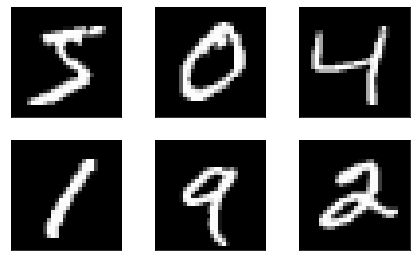

In [8]:
showImg(X, 6)

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [9]:
from sklearn.naive_bayes import GaussianNB

gaussian_model = GaussianNB()
gaussian_model.fit(train_X, train_Y)

gaussian_prediction = gaussian_model.predict(test_X)

MemoryError: Unable to allocate 359. MiB for an array with shape (59999, 784) and data type float64

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sgdClassifier_model = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3, loss='log'))
sgdClassifier_model.fit(train_X, train_Y)

sgdClassifier_prediction = sgdClassifier_model.predict(train_X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

randomForest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomForest_model.fit(train_X, train_Y)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(train_X, gaussian_prediction)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          